In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 표의 크기를 조정해준다.
plt.rcParams['figure.figsize'] = [10, 8]
sns.set(style='whitegrid')
sns.set_palette('pastel') # 시각화 테마
warnings.filterwarnings('ignore')

# % 한글이 깨지는 경우 %
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/NanumGothic.ttf").get_name()
    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# Loading 'Tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

In [5]:
# matplotlib 을 활용한 시각화
sum_tips_by_day = tips.groupby('day')['tip'].sum()
sum_tips_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [6]:
x_label = ['Thu', 'Fri', 'Sat', 'Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

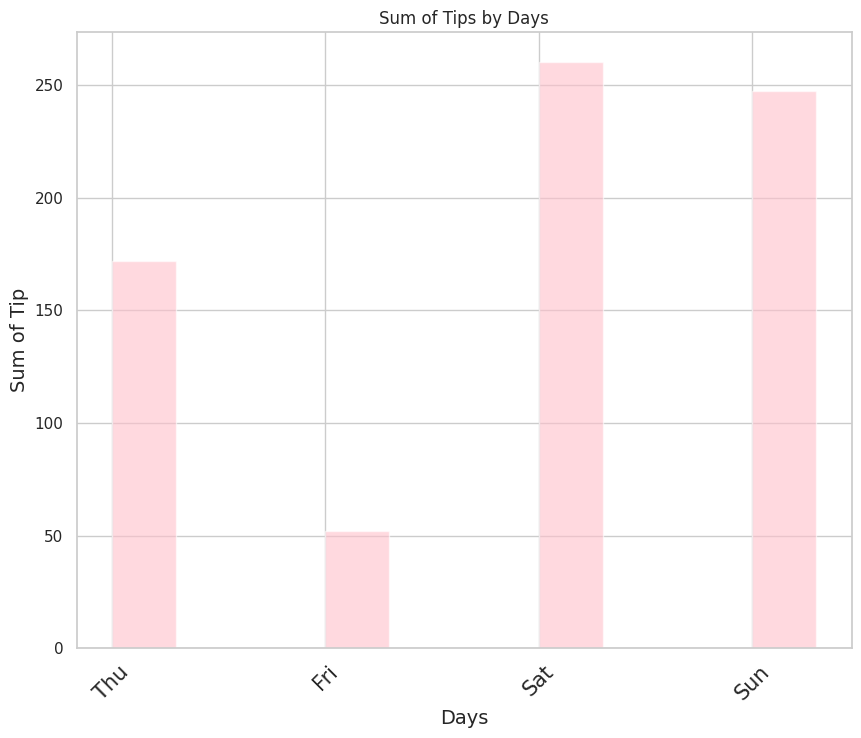

In [7]:
# Bar 차트 이해 및 제작
plt.bar(x_label, sum_tips_by_day,
        color = 'pink',
        alpha = 0.6,
        width = 0.3,
        align = 'edge')

# 제목 추가
plt.title('Sum of Tips by Days')
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Sum of Tip', fontsize = 14)

# x변수 가로축 수정이 가능하다.
plt.xticks(x_label_index,
           x_label,
           rotation = 45,
           fontsize = 15)

plt.show()

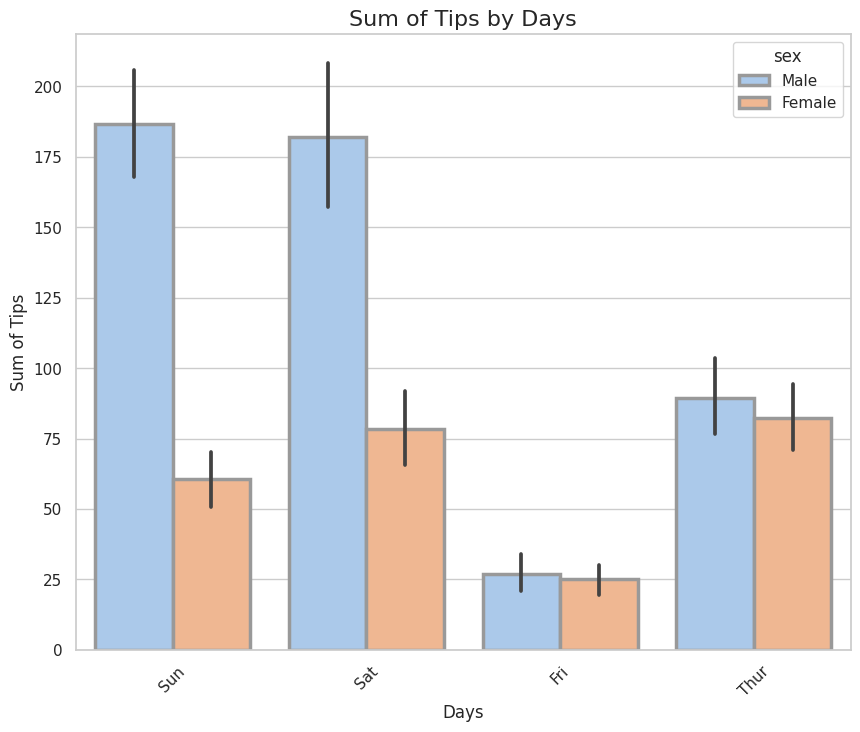

In [8]:
# seaborn 을 활용한 시각화
sns.barplot(data= tips, # 데이터프레임
            x = 'day', # x 변수
            y = 'tip', # y 변수
            estimator = np.sum, # 원하는 값들을 지정할 수 있다.
            hue = 'sex', # 색깔 구분으로 특정 컬럼값을 비교하고 싶을 때
            order = ['Sun', 'Sat', 'Fri', 'Thur'], # x ticks 순서
            edgecolor = '.6', # bar 모서리 선명도
            linewidth = 2.5)  # 모서리 두께

plt.title('Sum of Tips by Days', fontsize = 16)
plt.xlabel('Days')
plt.ylabel('Sum of Tips')
plt.xticks(rotation = 45)
plt.show()

In [9]:
# pie 차트 이해 및 제작
# matplotlib을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
ratio_tip_by_Day = sum_tip_by_day/sum_tip_by_day.sum()


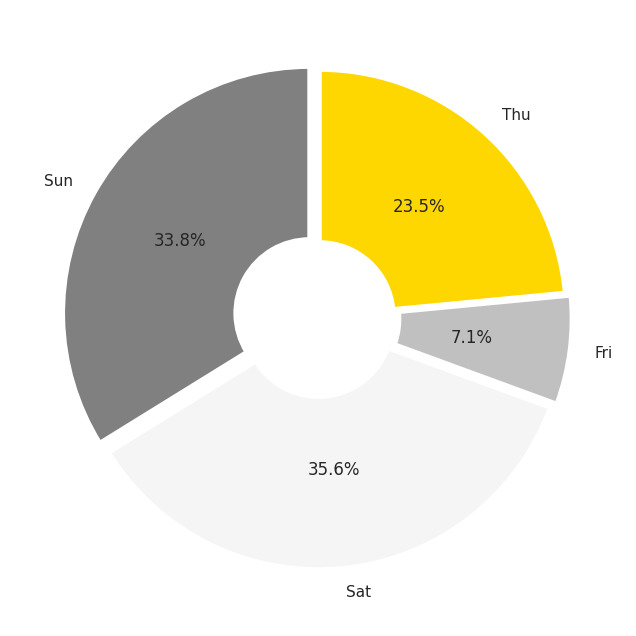

In [25]:
x_label = ['Thu', 'Fri', 'Sat', 'Sun']

plt.pie(ratio_tip_by_Day, # 비율값
        labels = x_label, # 라벨값
        autopct ='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수 2자리까지)
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=False, # True : 시계방향순, False: 반시계 방향순
        explode=[0.01, 0.03, 0.02, 0.04], # 중심에서 벗어나는 정도 표시
        colors=['gold', 'silver', 'whitesmoke', 'gray'], # 그림자 표시 여부
        wedgeprops={'width':0.7, 'edgecolor' : 'w', 'linewidth': 3}) # 도넛 차트를 그릴 때 사용
plt.show()

In [26]:
# Line 차트 이해 및 제작

# matplotlib 을 활용해서 시각화
# line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용
sun_tips =tips[tips['day']=='Sun']

In [27]:
# 현재 서버 시간을 얻기 위해 datetime 라이브러리 사용하기
import datetime

# 오늘 날짜를 찍어줌
datetime.date.today()

datetime.date(2023, 11, 29)

In [29]:
date = []
today = datetime.date.today()
date.append(today)

for time in range(sun_tips.shape[0]-1):
  today += datetime.timedelta(1) # 하루씩 추가한다.
  date.append(today)

In [30]:
sun_tips['date'] = date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2023-11-29
1,10.34,1.66,Male,No,Sun,Dinner,3,2023-11-30
2,21.01,3.50,Male,No,Sun,Dinner,3,2023-12-01
3,23.68,3.31,Male,No,Sun,Dinner,2,2023-12-02
4,24.59,3.61,Female,No,Sun,Dinner,4,2023-12-03
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2024-02-08
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2024-02-09
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2024-02-10
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2024-02-11


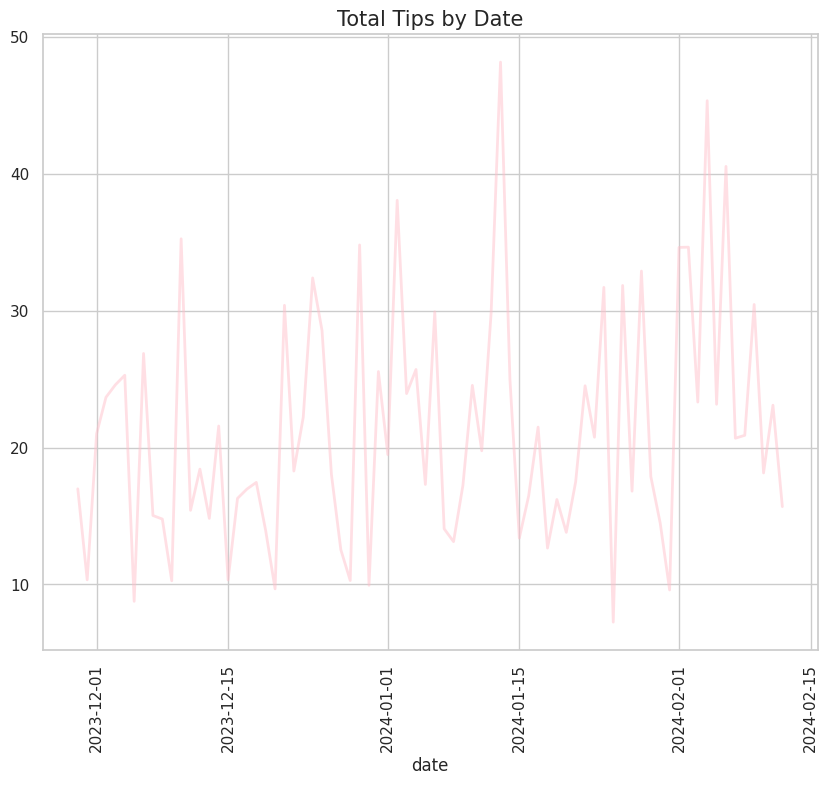

In [39]:
# line chart

plt.plot(sun_tips['date'], sun_tips['total_bill'],
         linestyle = '-', # 선 모양
         linewidth = 2, # 선 두께
         color = 'pink', # 색상 선택
         alpha = 0.5) # 투명도
plt.xlabel('date')
plt.title('Total Tips by Date', fontsize = 15)
plt.xticks(rotation =  90)
plt.show()

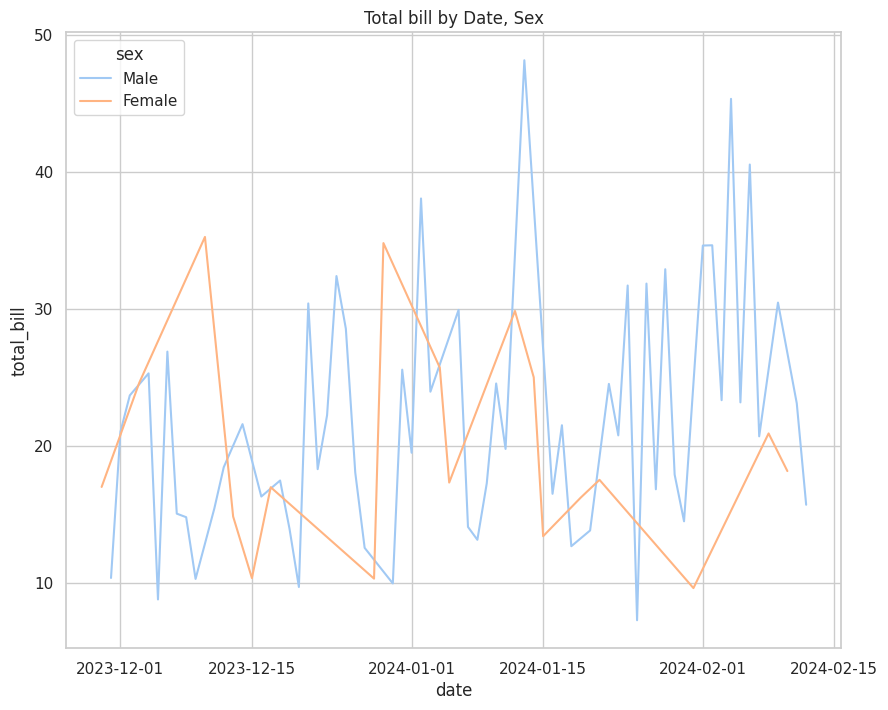

In [44]:
# seaborn 을 활용한 시각화
sns.lineplot(data = sun_tips,
             x = 'date',
             y = 'total_bill',
             hue = 'sex')
plt.title('Total bill by Date, Sex')
plt.show()

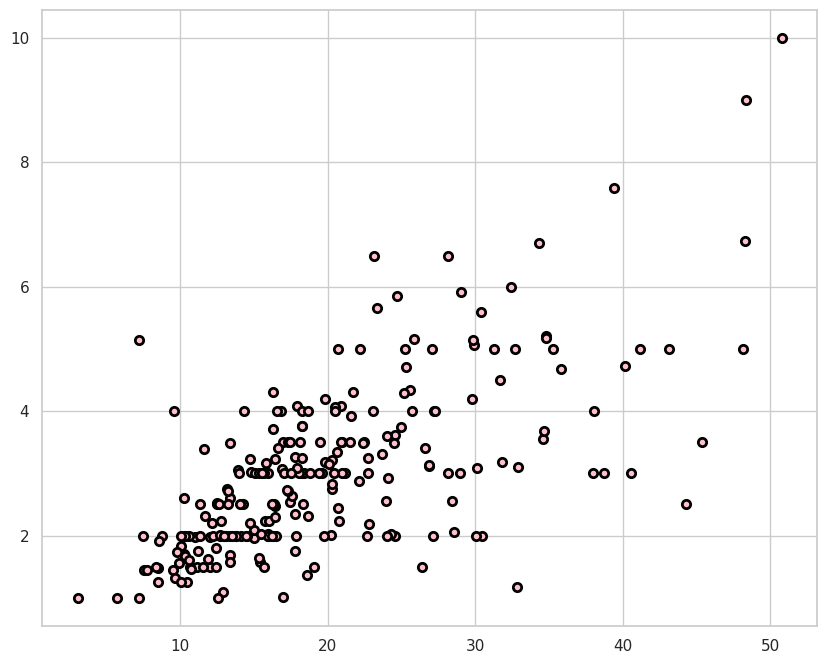

In [46]:
# Scatter 차트 이해 및 제작

# matplotlib 을 활용한 시각화
plt.scatter(tips['total_bill'], tips['tip'],
            color = 'pink', # 색상
            edgecolor = 'black', # 테두리 색깔
            linewidth = 2) # 선 두께

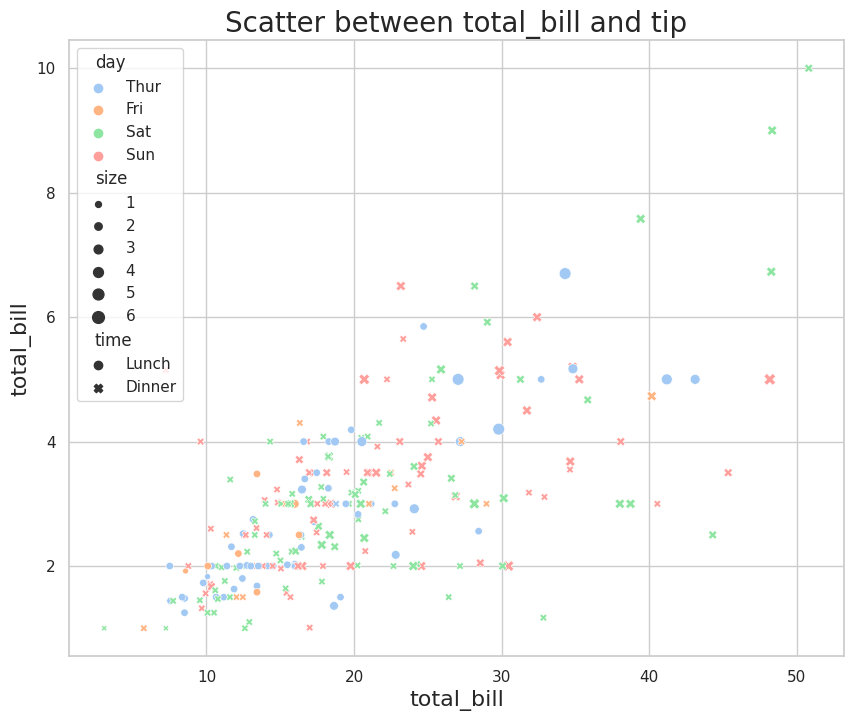

In [53]:
# Seaborn 을 활용한 시각화
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                style = 'time', # 모양 구분으로 다른 변수랑 비교
                hue ='day', # 색깔 구분으로 다른 변수랑 비교
                size = 'size') # 크기 구분으로 다른 변수랑 비교
plt.title('Scatter between total_bill and tip', fontsize = 20)
plt.xlabel('total_bill', fontsize = 16)
plt.ylabel('total_bill', fontsize = 16)
plt.show()

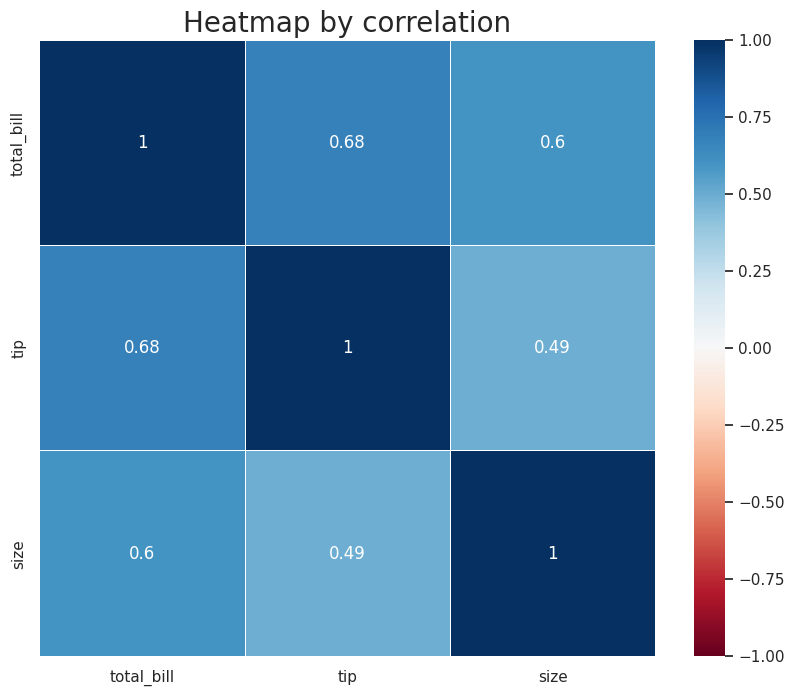

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [61]:
# Heat Map 차트 이해 및 제작

# seaborn 을 활용한 시각화 - 상관관계에 대한 그래프
sns.heatmap(tips.corr(),
            annot = True, # 상관관계의 크기를 나타낸다.
            square = True, # 박스를 정사각형으로
            vmin = -1, vmax =1, # 최소 최댓값 지정
            linewidth = .5, # 라인 두께 지정
            cmap = 'RdBu' # 색상 선택
            )
plt.title('Heatmap by correlation', fontsize = 20)
plt.show()
tips.corr()

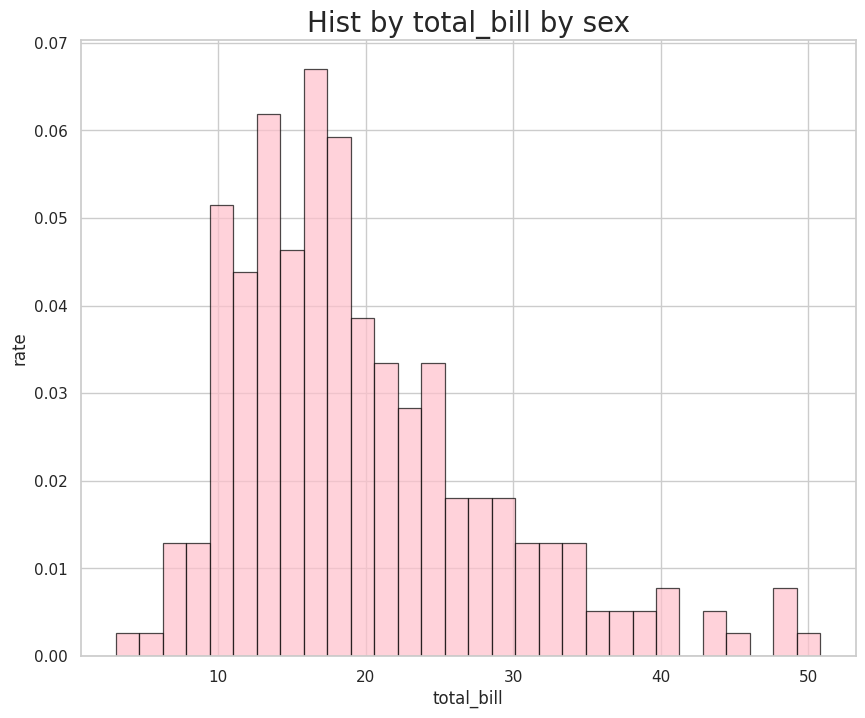

In [78]:
# Histogram 차트 이해 및 제작
# matplotlib을 활용한 시각화

plt.hist(tips['total_bill'],
         bins=30,
         density = True, # 비율적으로 보여준다.
         alpha = 0.7,
         color = 'pink',
         edgecolor = 'black',
         linewidth = 0.9)
plt.title('Hist by total_bill by sex', fontsize = 20)
plt.xlabel('total_bill')
plt.ylabel('rate')

plt.show()

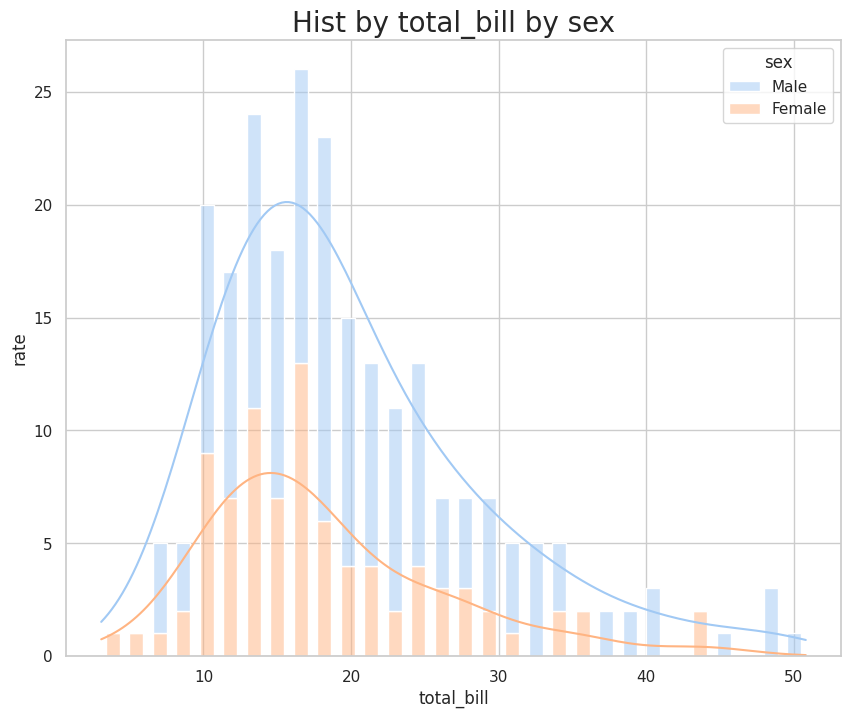

In [79]:
# seaborn 을 활용한 시각화

sns.histplot(data = tips,
             x ='total_bill',
             bins = 30,
             kde = True, # 분포를 선으로 나타내줌
             hue = 'sex',
             multiple = 'stack', # 따로따로 구분해서 보고 싶을 때 사용
             shrink = 0.6)
plt.title('Hist by total_bill by sex', fontsize = 20)
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

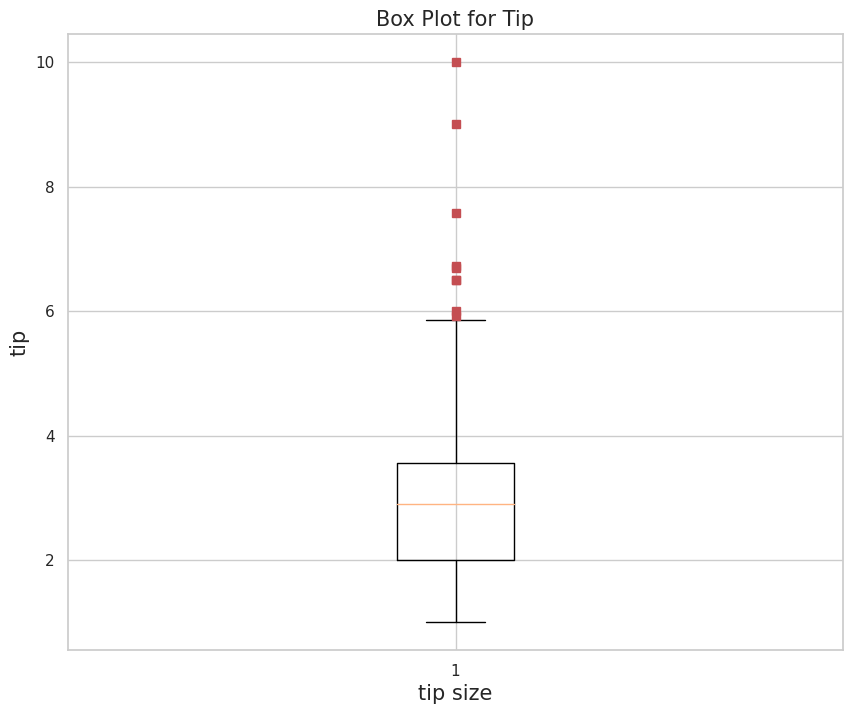

In [85]:
# Box 차트 이해하기 -> outlier 제거를 위함, 변수 상황에 맞게 사용한다.

# matplotlib을 활용한 시각화
plt.boxplot(tips['tip'],
            sym = 'rs')
plt.title('Box Plot for Tip',fontsize = 15)
plt.xlabel('tip size', fontsize = 15)
plt.ylabel('tip', fontsize = 15)

plt.show()

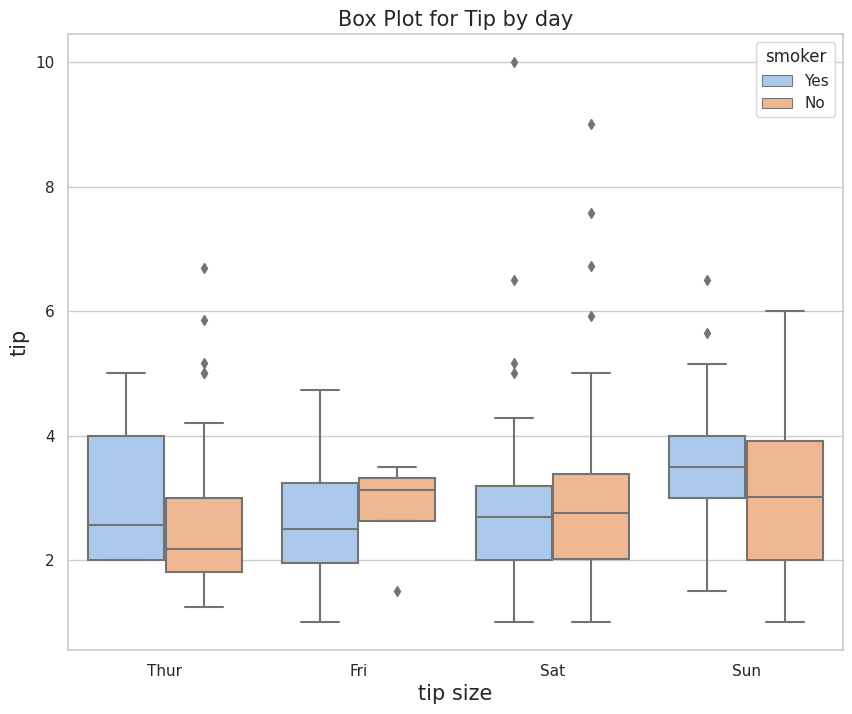

In [86]:
# seaborn 을 활용한 시각과

sns.boxplot(data = tips,
            x = 'day',
            y = 'tip',
            hue = 'smoker')
plt.title('Box Plot for Tip by day',fontsize = 15)
plt.xlabel('tip size', fontsize = 15)
plt.ylabel('tip', fontsize = 15)

plt.show()

In [ ]:

# 정제 -> 수집 -> 분석으로

# 엔지니어링(시장이 더 넓음) -> 분석 이쪽으로 가는 편이 좋겠다. 조금 더 쉬운 루트
# 분석 머신러닝만 이해하고 있어도 된다.
# 물리적인 개념에 관한 지식을 쌓는 것을 추천 -> 서버 베이스, 리눅스 사용.
# 리눅스 관련 공부 필요